In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import mean_squared_error

In [2]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [3]:
# Define the regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

In [4]:
# Set seed for reproducibility
np.random.seed(1234)

# Generate data
X = np.random.uniform(5, 15, 100)
Y = reg(X) + np.random.normal(0, 5, 100)

# # Create DataFrame
# Sim_1 = pd.DataFrame({'X': X, 'Y': Y})

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [8]:
# x_train

In [8]:
# # Split into training and testing sets
# Train_set = Sim_1.iloc[:80]
# Test_set = Sim_1.iloc[80:]

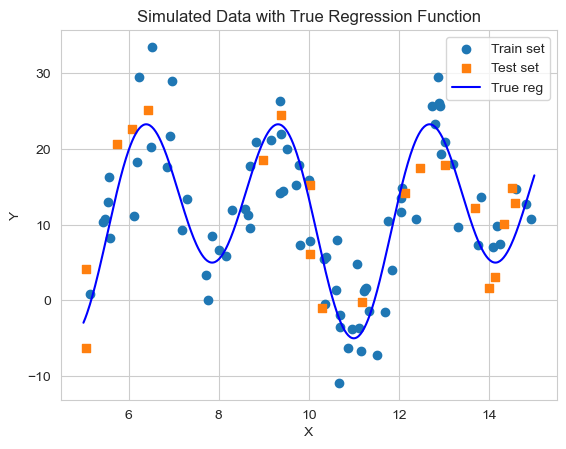

In [9]:
# Plot the training and testing points
plt.scatter(x_train, y_train, marker='o', label='Train set')
plt.scatter(x_test, y_test, marker='s', label='Test set')

# Plot the true regression curve
x_curve = np.linspace(5, 15, 500); y_curve = reg(x_curve)
plt.plot(x_curve, y_curve, c='blue', label='True reg')

plt.xlabel('X'); plt.ylabel('Y')
plt.legend()
plt.title('Simulated Data with True Regression Function')
# plt.grid(True)
plt.show()

## LOWESS

In [ ]:
W = lowess(y_train, x_train, frac=0.2, xvals=x_curve)
W.shape

(500,)

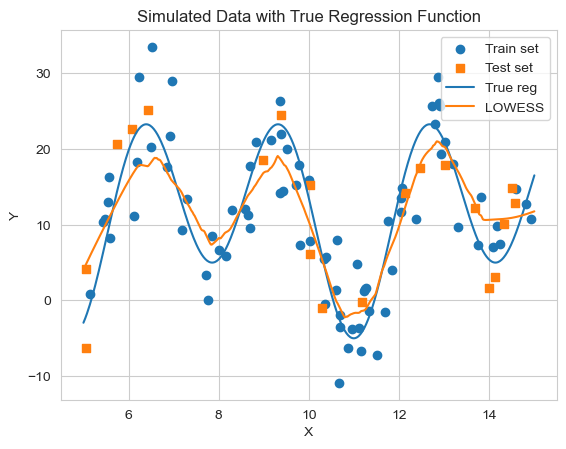

In [24]:
# Plot the training and testing points
plt.scatter(x_train, y_train, marker='o', label='Train set')
plt.scatter(x_test, y_test, marker='s', label='Test set')

plt.plot(x_curve, y_curve, label='True reg')
plt.plot(x_curve, W, label='LOWESS')

plt.xlabel('X'); plt.ylabel('Y')
plt.legend()
plt.title('Simulated Data with True Regression Function')
# plt.grid(True)
plt.show()

In [25]:
y_pr_trn = lowess(y_train, x_train, frac=0.2, xvals=x_train)
y_pr_tst = lowess(y_train, x_train, frac=0.2, xvals=x_test)

In [26]:
trn_mse = mean_squared_error(y_train, y_pr_trn)
tst_mse = mean_squared_error(y_test, y_pr_tst)

print('Train MSE: ', trn_mse)
print('Test MSE: ', tst_mse)

Train MSE:  23.98871181146864
Test MSE:  28.4969359033754


### Repeat the procedure 50 times and compute the average train and test MSEs for various values of frac parameter

In [7]:
tr_Mse = []
ts_Mse = []
Frac = np.linspace(0.1, 1, 6)
for f in Frac:
    trn_mse = []
    tst_mse = []

    for i in range(50):
        # Generate data
        X = np.random.uniform(5, 15, 100)
        Y = reg(X) + np.random.normal(0, 5, 100)

        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

        x_curve = np.linspace(5, 15, 500); y_curve = reg(x_curve)

        W = lowess(y_train, x_train, frac=f, xvals=x_curve)

        y_pr_trn = lowess(y_train, x_train, frac=f, xvals=x_train)
        y_pr_tst = lowess(y_train, x_train, frac=f, xvals=x_test)

        trn_mse.append(mean_squared_error(y_train, y_pr_trn))
        tst_mse.append(mean_squared_error(y_test, y_pr_tst))
    tr_Mse.append(np.mean(trn_mse))
    ts_Mse.append(np.mean(tst_mse))
    print(f'Avg. Train MSE for h={f}: ', np.mean(trn_mse))
    print(f'Avg. Test MSE for h={f}: ', np.mean(tst_mse))

Avg. Train MSE for h=0.1:  18.371456145843666
Avg. Test MSE for h=0.1:  33.33376860778487
Avg. Train MSE for h=0.28:  36.76343053530405
Avg. Test MSE for h=0.28:  46.20110785313955
Avg. Train MSE for h=0.45999999999999996:  66.6448125518964
Avg. Test MSE for h=0.45999999999999996:  76.249654803195
Avg. Train MSE for h=0.64:  87.31248510028527
Avg. Test MSE for h=0.64:  90.32770848837092
Avg. Train MSE for h=0.82:  91.32823068244392
Avg. Test MSE for h=0.82:  96.5631630177758
Avg. Train MSE for h=1.0:  88.6780696502881
Avg. Test MSE for h=1.0:  89.77211189298428


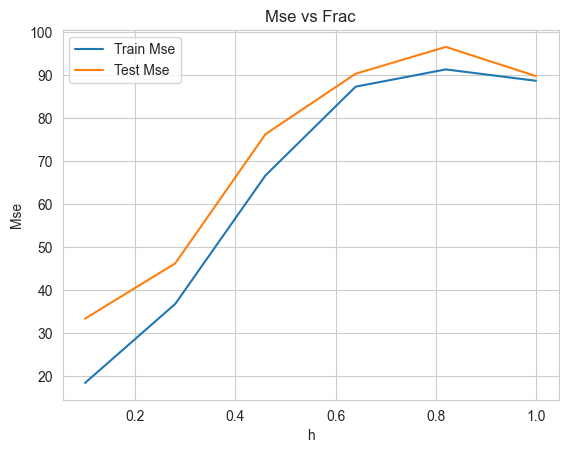

In [10]:
plt.plot(Frac,tr_Mse, label='Train Mse')
plt.plot(Frac, ts_Mse, label='Test Mse')

plt.xlabel('h'); plt.ylabel('Mse')
plt.legend()
plt.title('Mse vs Frac')
plt.show()

## DO the same for Boston Dataset

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
# Load Boston dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
display(boston.frame.head())
df = boston.frame[['LSTAT' ,  'MEDV']].copy()
df.columns = ['X', 'Y']

# Sort data by predictor (X = lstat)
df = df.sort_values(by='X').reset_index(drop=True)
display(df.head())

In [ ]:
X = np.array(df['X'])
y = np.array(df['Y'])